# Car Price Prediction

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/nisha/Projects/Car Price Prediction/CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Analysis

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.drop('car_ID', axis=1, inplace=True)

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Minimum Price: 5118.0
Maximum Price: 45400.0


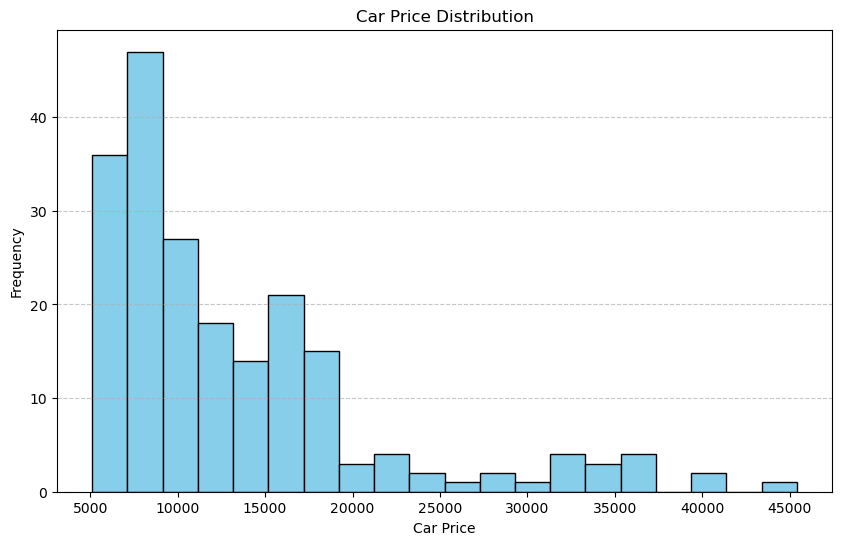

In [9]:
import matplotlib.pyplot as plt

# Calculate the range of the target column ('price')
min_price = df['price'].min()
max_price = df['price'].max()

# Print the range
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Car Price Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
# Count the number of unique car types
unique_car_types = df['CarName'].nunique()
print("Number of unique car types:", unique_car_types)


Number of unique car types: 147


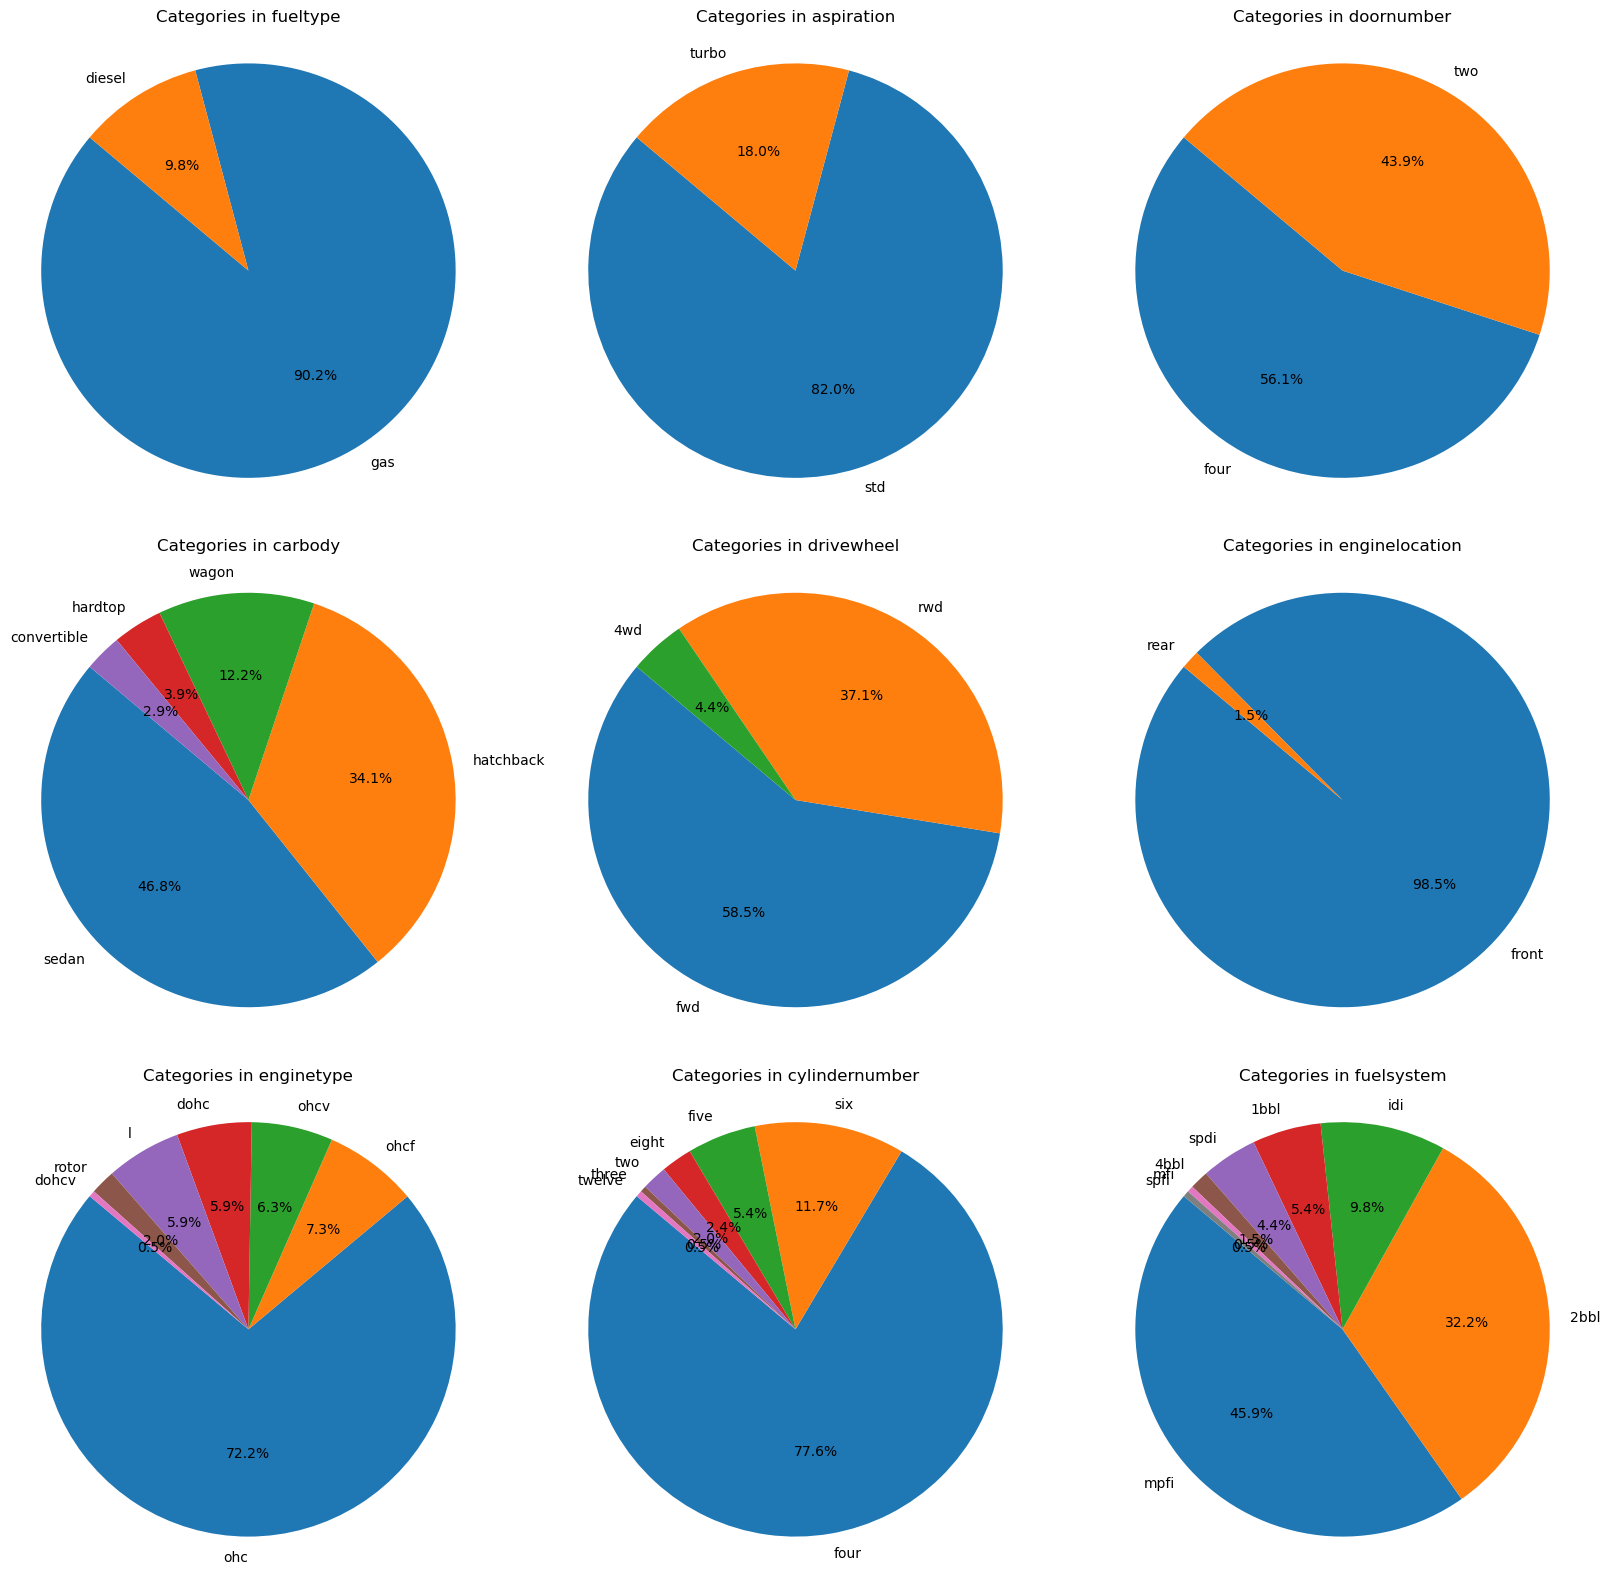

In [11]:
import matplotlib.pyplot as plt
import math

# List of categorical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Determine the number of rows and columns for the grid
num_columns = 3
num_rows = math.ceil(len(categorical_columns) / num_columns)

# Create subplots in a grid
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1)

for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values

    # Calculate the row and column indices for the subplot
    row = i // num_columns
    col = i % num_columns

    # Create a pie chart in the specified subplot
    axs[row, col].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(f'Categories in {column}')
    axs[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Hide any empty subplots
for i in range(len(categorical_columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    axs[row, col].axis('off')

plt.show()


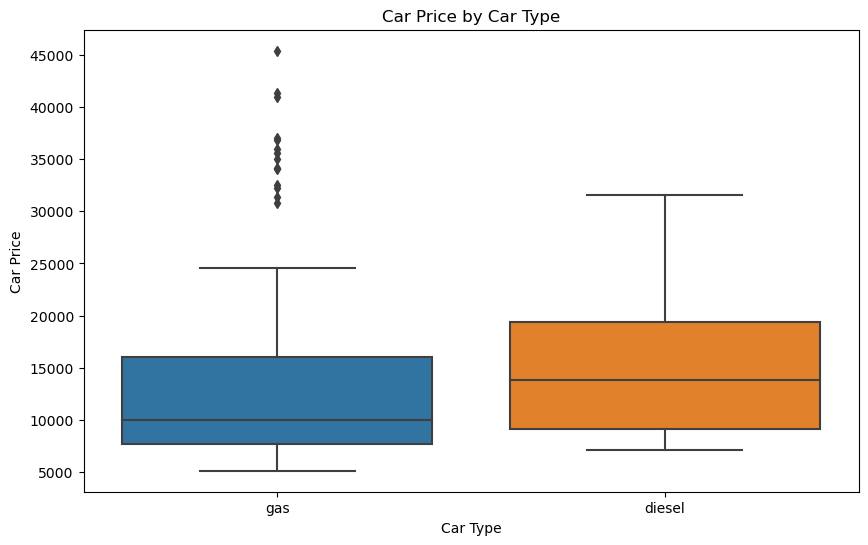

In [12]:
# Box plot of car price by car type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fueltype', y='price')
plt.xlabel('Car Type')
plt.ylabel('Car Price')
plt.title('Car Price by Car Type')
plt.show()


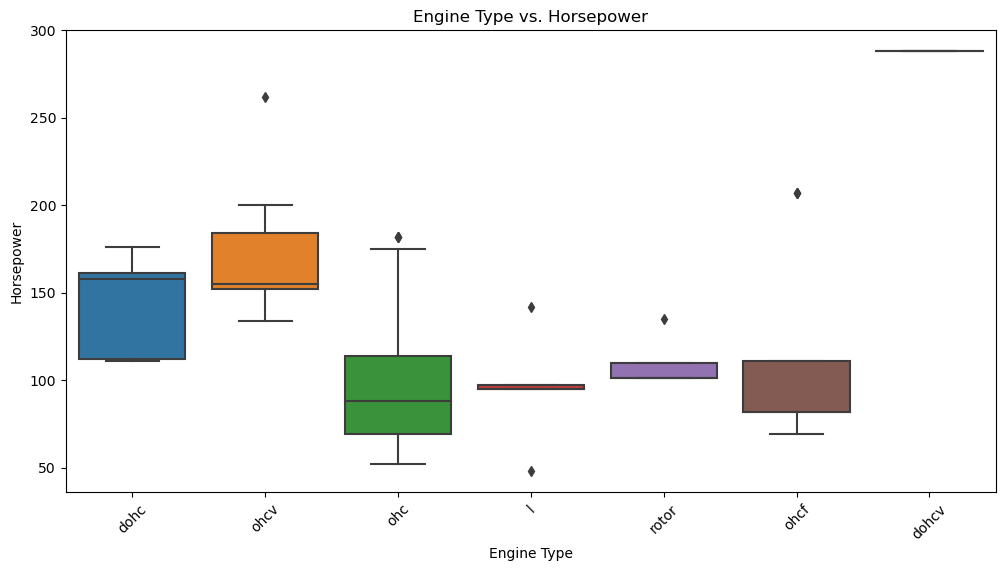

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='enginetype', y='horsepower')
plt.xlabel('Engine Type')
plt.ylabel('Horsepower')
plt.title('Engine Type vs. Horsepower')
plt.xticks(rotation=45)
plt.show()


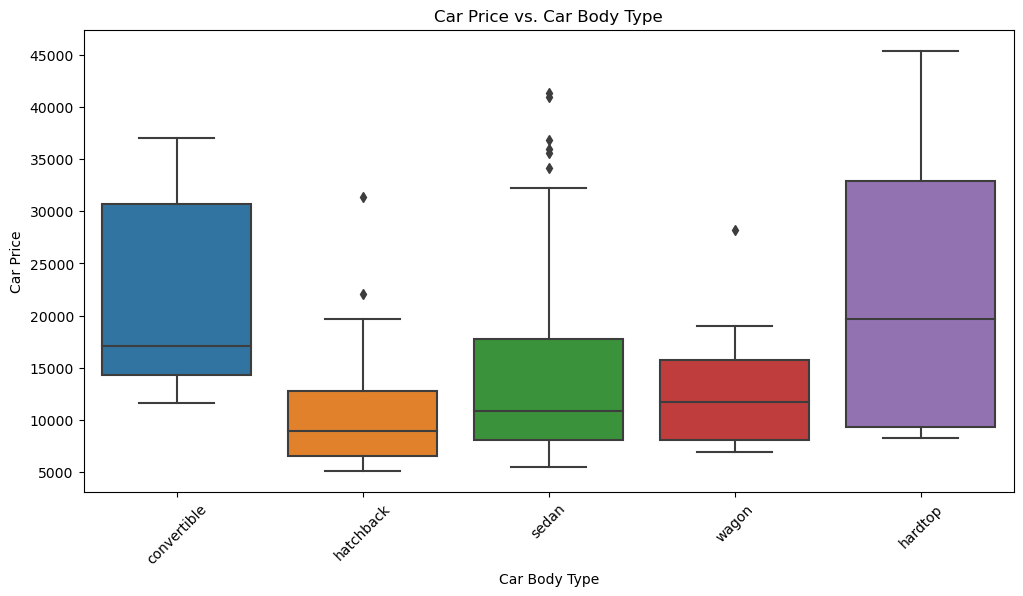

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='carbody', y='price')
plt.xlabel('Car Body Type')
plt.ylabel('Car Price')
plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()


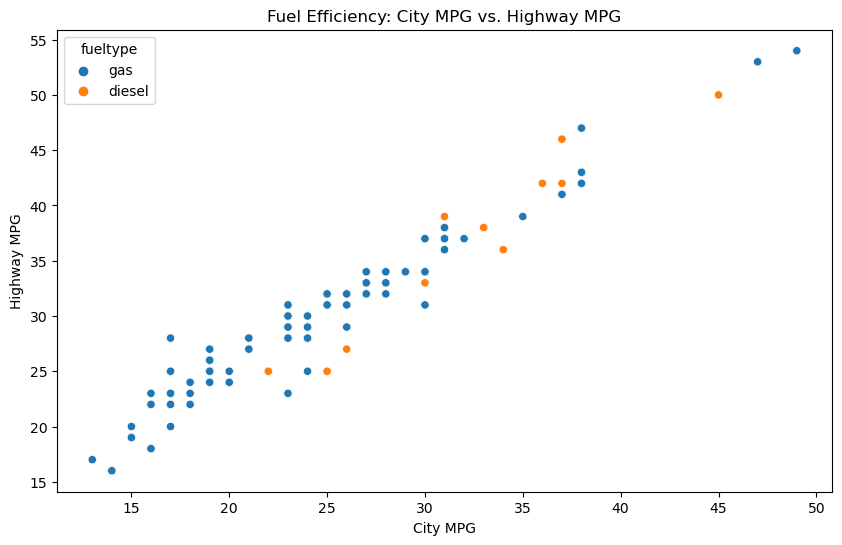

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='citympg', y='highwaympg', hue='fueltype')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Fuel Efficiency: City MPG vs. Highway MPG')
plt.show()


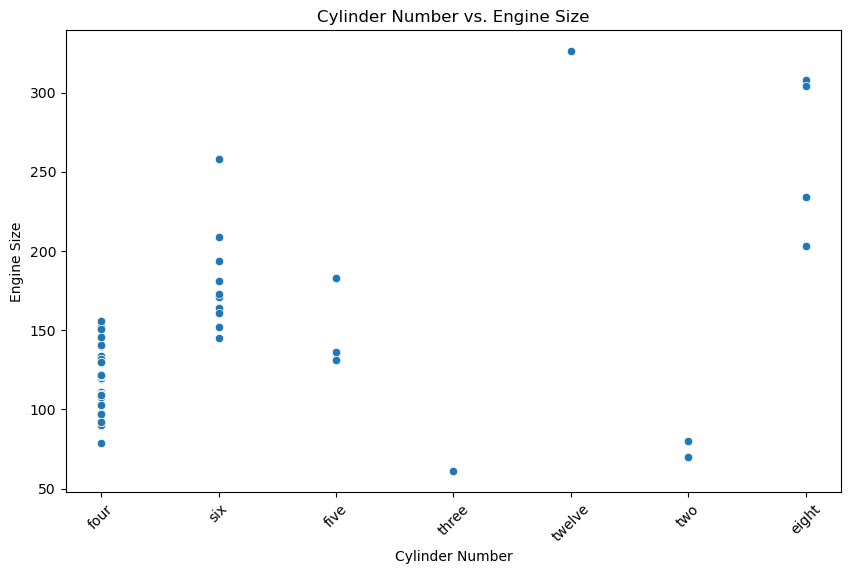

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cylindernumber', y='enginesize')
plt.xlabel('Cylinder Number')
plt.ylabel('Engine Size')
plt.title('Cylinder Number vs. Engine Size')
plt.xticks(rotation=45)
plt.show()


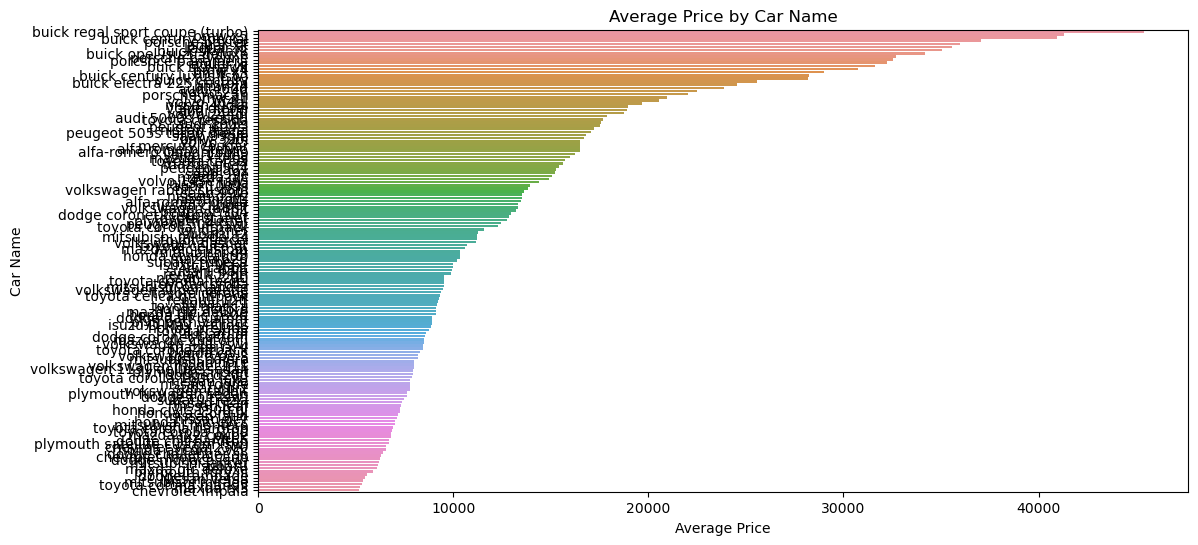

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price for each unique car name
carname_price_relation = df.groupby('CarName')['price'].mean().reset_index()

# Sort by average price in descending order
carname_price_relation = carname_price_relation.sort_values(by='price', ascending=False)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='CarName', data=carname_price_relation)
plt.title('Average Price by Car Name')
plt.xlabel('Average Price')
plt.ylabel('Car Name')
plt.show()


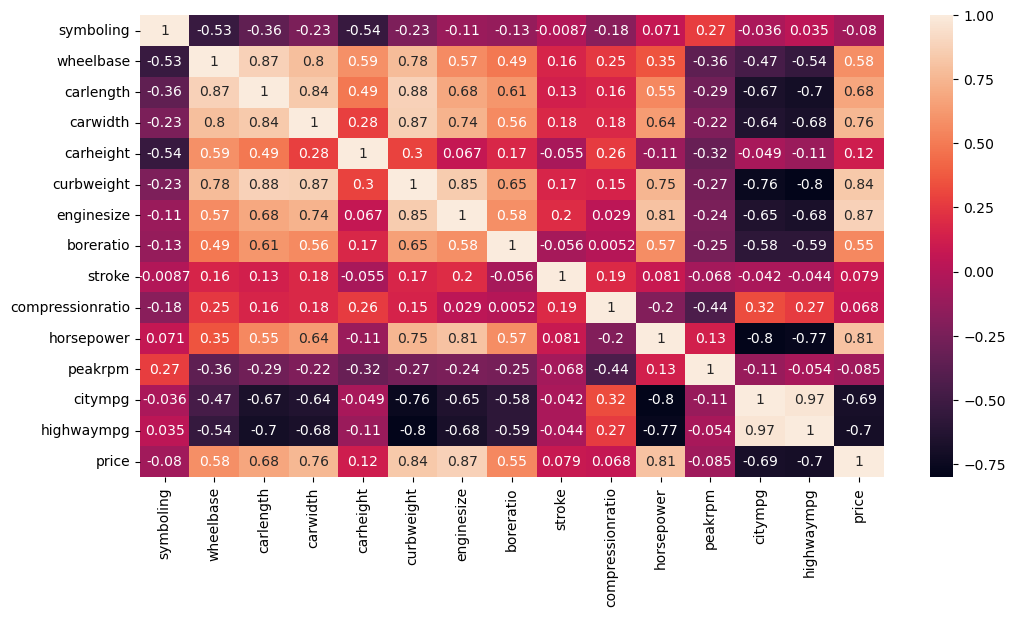

In [18]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [19]:
# List of categorical columns to find unique values
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Loop through each categorical column and print unique values
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'fueltype': ['gas' 'diesel']
Unique values in 'aspiration': ['std' 'turbo']
Unique values in 'doornumber': ['two' 'four']
Unique values in 'carbody': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in 'drivewheel': ['rwd' 'fwd' '4wd']
Unique values in 'enginelocation': ['front' 'rear']
Unique values in 'enginetype': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in 'cylindernumber': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in 'fuelsystem': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [21]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
# Split the data into features (X) and the target variable (y)
X = df.iloc[:, :-1]  # Exclude the last column ('price') as features
y = df['price']

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train a Random Forest Regressor
random_forest_model = Ran

domForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Random Forest Regressor:
Mean Squared Error: 3551629.60
Mean Absolute Error: 1311.47
R-squared: 0.96


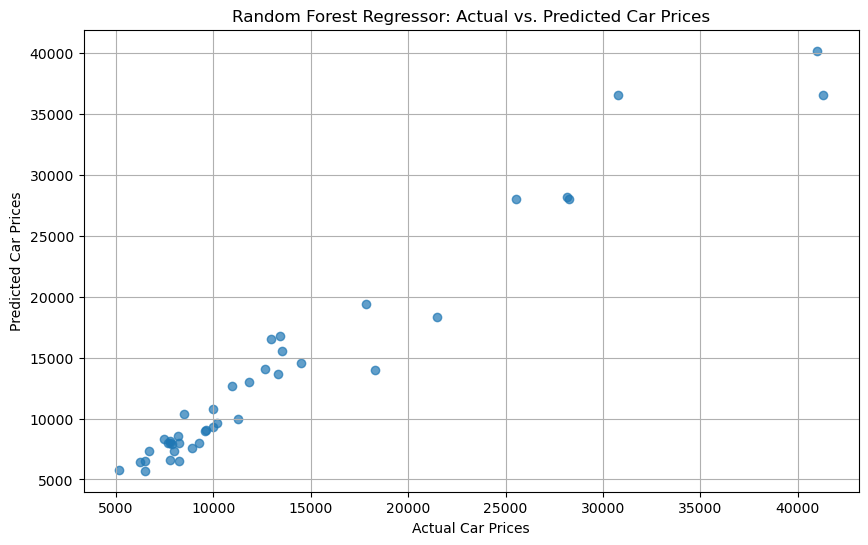

In [26]:
import matplotlib.pyplot as plt

# Scatterplot of actual vs. predicted car prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Random Forest Regressor: Actual vs. Predicted Car Prices")
plt.grid(True)
plt.show()


Now, let us take first row of the dataset and predict the price.

In [27]:
first_row = df.iloc[0]
values_list = first_row.tolist()
print(values_list)

[3.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 88.6, 168.8, 64.1, 48.8, 2548.0, 0.0, 2.0, 130.0, 5.0, 3.47, 2.68, 9.0, 111.0, 5000.0, 21.0, 27.0, 13495.0]


As you can see the price is 13495.0

Now let us use the model to predict the price

In [28]:
new_car_features = [3.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 88.6, 168.8, 64.1, 48.8, 2548.0, 0.0, 2.0, 130.0, 5.0, 3.47, 2.68, 9.0, 111.0, 5000.0, 21.0, 27.0]

In [29]:
# Convert the 'new_car_features' list to a numpy array
new_car_features = np.array(new_car_features).reshape(1, -1)

# Scale the new car features using the same StandardScaler used for the training data
new_car_features_scaled = sc.transform(new_car_features)

# Make a prediction using the trained model
predicted_price = random_forest_model.predict(new_car_features_scaled)

# Print the predicted price
print(f"Predicted Price for the New Car: {predicted_price[0]:.2f}")


Predicted Price for the New Car: 14588.40


C:\Users\nisha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The predicted price is 14588.40 which is near to the original price